# 言語処理100本ノック

https://nlp100.github.io/ja/

## 第4章: 形態素解析

[MeCabマニュアル](https://taku910.github.io/mecab/)


In [58]:
# Install MeCab

!apt install aptitude swig
!aptitude install mecab libmecab-dev mecab-ipadic-utf8 git make curl xz-utils file -y
!pip install mecab-python3

# Install pyfpgrowth
!pip install pyfpgrowth

# Install Japanese font
!apt-get -y install fonts-ipafont-gothic

Reading package lists... Done
Building dependency tree       
Reading state information... Done
aptitude is already the newest version (0.8.10-6ubuntu1).
swig is already the newest version (3.0.12-1).
0 upgraded, 0 newly installed, 0 to remove and 25 not upgraded.
mecab is already installed at the requested version (0.996-5)
libmecab-dev is already installed at the requested version (0.996-5)
mecab-ipadic-utf8 is already installed at the requested version (2.7.0-20070801+main-1)
git is already installed at the requested version (1:2.17.1-1ubuntu0.5)
make is already installed at the requested version (4.1-9.1ubuntu1)
curl is already installed at the requested version (7.58.0-2ubuntu3.8)
xz-utils is already installed at the requested version (5.2.2-1.3)
file is already installed at the requested version (1:5.32-2ubuntu0.3)
mecab is already installed at the requested version (0.996-5)
libmecab-dev is already installed at the requested version (0.996-5)
mecab-ipadic-utf8 is already install

In [59]:
!curl -fsSLO https://nlp100.github.io/data/neko.txt
!ls -l neko.txt

-rw-r--r-- 1 root root 965825 Apr 17 11:41 neko.txt


In [60]:
!mecab neko.txt -o neko.txt.mecab
!ls -l neko.txt.mecab
!head -n 20 neko.txt.mecab
# 表層形\t品詞,品詞細分類1,品詞細分類2,品詞細分類3,活用型,活用形,原形,読み,発音

-rw-r--r-- 1 root root 11515901 Apr 17 11:41 neko.txt.mecab
一	名詞,数,*,*,*,*,一,イチ,イチ
EOS
EOS
　	記号,空白,*,*,*,*,　,　,　
吾輩	名詞,代名詞,一般,*,*,*,吾輩,ワガハイ,ワガハイ
は	助詞,係助詞,*,*,*,*,は,ハ,ワ
猫	名詞,一般,*,*,*,*,猫,ネコ,ネコ
で	助動詞,*,*,*,特殊・ダ,連用形,だ,デ,デ
ある	助動詞,*,*,*,五段・ラ行アル,基本形,ある,アル,アル
。	記号,句点,*,*,*,*,。,。,。
EOS
名前	名詞,一般,*,*,*,*,名前,ナマエ,ナマエ
は	助詞,係助詞,*,*,*,*,は,ハ,ワ
まだ	副詞,助詞類接続,*,*,*,*,まだ,マダ,マダ
無い	形容詞,自立,*,*,形容詞・アウオ段,基本形,無い,ナイ,ナイ
。	記号,句点,*,*,*,*,。,。,。
EOS
EOS
　	記号,空白,*,*,*,*,　,　,　
どこ	名詞,代名詞,一般,*,*,*,どこ,ドコ,ドコ


In [0]:
import MeCab
import pyfpgrowth

from pprint import pprint
from collections import defaultdict

import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

%matplotlib inline

fp = FontProperties(fname='/usr/share/fonts/opentype/ipafont-gothic/ipagp.ttf')

In [62]:
# 30. 形態素解析結果の読み込み

with open('neko.txt.mecab', 'r') as f:
    contents = f.readlines()

neko = []
for c in contents:
    if 'EOS' in c:
        continue

    try:
        cl = c.split('\t')
        s = cl[0]
        cl = cl[1].split(',')
        b = cl[6]
        p = cl[0]
        p1 = cl[1]
    except:
        print(c)
        continue

    neko.append({'surface': s, 'base': b, 'pos': p, 'pos1': p1})

print(len(neko))
pprint(neko[:30])

206338
[{'base': '一', 'pos': '名詞', 'pos1': '数', 'surface': '一'},
 {'base': '\u3000', 'pos': '記号', 'pos1': '空白', 'surface': '\u3000'},
 {'base': '吾輩', 'pos': '名詞', 'pos1': '代名詞', 'surface': '吾輩'},
 {'base': 'は', 'pos': '助詞', 'pos1': '係助詞', 'surface': 'は'},
 {'base': '猫', 'pos': '名詞', 'pos1': '一般', 'surface': '猫'},
 {'base': 'だ', 'pos': '助動詞', 'pos1': '*', 'surface': 'で'},
 {'base': 'ある', 'pos': '助動詞', 'pos1': '*', 'surface': 'ある'},
 {'base': '。', 'pos': '記号', 'pos1': '句点', 'surface': '。'},
 {'base': '名前', 'pos': '名詞', 'pos1': '一般', 'surface': '名前'},
 {'base': 'は', 'pos': '助詞', 'pos1': '係助詞', 'surface': 'は'},
 {'base': 'まだ', 'pos': '副詞', 'pos1': '助詞類接続', 'surface': 'まだ'},
 {'base': '無い', 'pos': '形容詞', 'pos1': '自立', 'surface': '無い'},
 {'base': '。', 'pos': '記号', 'pos1': '句点', 'surface': '。'},
 {'base': '\u3000', 'pos': '記号', 'pos1': '空白', 'surface': '\u3000'},
 {'base': 'どこ', 'pos': '名詞', 'pos1': '代名詞', 'surface': 'どこ'},
 {'base': 'で', 'pos': '助詞', 'pos1': '格助詞', 'surface': 'で'},
 {'base':

In [63]:
# 31. 動詞

verb_s = [n['surface'] for n in neko if n['pos'] == '動詞']

print(len(verb_s))
pprint(verb_s[:20])

28906
['生れ',
 'つか',
 'し',
 '泣い',
 'し',
 'いる',
 '始め',
 '見',
 '聞く',
 '捕え',
 '煮',
 '食う',
 '思わ',
 '載せ',
 'られ',
 '持ち上げ',
 'られ',
 'し',
 'あっ',
 '落ちつい']


In [64]:
# 32. 動詞の原形

verb_b = [n['base'] for n in neko if n['pos'] == '動詞']

print(len(verb_b))
pprint(verb_b[:20])

28906
['生れる',
 'つく',
 'する',
 '泣く',
 'する',
 'いる',
 '始める',
 '見る',
 '聞く',
 '捕える',
 '煮る',
 '食う',
 '思う',
 '載せる',
 'られる',
 '持ち上げる',
 'られる',
 'する',
 'ある',
 '落ちつく']


In [65]:
# 33. 「AのB」

ab = []

for i, n in enumerate(neko):
    try:
        if (
            n['surface'] == 'の'
            and neko[i-1]['pos'] == '名詞'
            and neko[1+1]['pos'] == '名詞'
        ):
            ab.append(
                neko[i-1]['surface']
                + n['surface']
                + neko[i+1]['surface']
            )
    except:
        print(n)
        continue

print(len(ab))
pprint(ab[:20])

7096
['彼の掌',
 '掌の上',
 '書生の顔',
 'ものの見',
 'はずの顔',
 '顔の真中',
 '穴の中',
 '人間の飲む',
 '書生の掌',
 '掌の裏',
 '何の事',
 '肝心の母親',
 '藁の上',
 '笹原の中',
 '池の前',
 '池の上',
 '食物のある',
 '竹垣の崩れ',
 '一樹の蔭',
 '垣根の穴']


In [66]:
# 34. 名詞の連接

ns = []
continuous = 0

for n in neko:
    if continuous == 0:
        nn = ''
    if n['pos'] == '名詞':
        continuous += 1
        nn += n['surface']
    else:
        if continuous > 1:
            ns.append(nn)
        continuous = 0

print(len(ns))
pprint(ns[:20])

7338
['人間中',
 '一番獰悪',
 '時妙',
 '一毛',
 'その後猫',
 '一度',
 'ぷうぷうと煙',
 '邸内',
 '三毛',
 '書生以外',
 '四五遍',
 'この間おさん',
 '三馬',
 '御台所',
 'まま奥',
 '住家',
 '終日書斎',
 '勉強家',
 '勉強家',
 '勤勉家']


In [67]:
# 35. 単語の出現頻度

c = defaultdict(int)

for n in neko:
    # if n['pos'] in ['名詞']:
    #     c[n['surface']] += 1
    c[n['surface']] += 1

count = sorted(c.items(), key=lambda k_v: k_v[1], reverse=True)

print(len(count))
pprint(count[:20])

13584
[('の', 9194),
 ('。', 7486),
 ('て', 6868),
 ('、', 6772),
 ('は', 6420),
 ('に', 6243),
 ('を', 6071),
 ('と', 5508),
 ('が', 5337),
 ('た', 3988),
 ('で', 3806),
 ('「', 3231),
 ('」', 3225),
 ('も', 2479),
 ('ない', 2390),
 ('だ', 2363),
 ('し', 2322),
 ('から', 2032),
 ('ある', 1728),
 ('な', 1613)]


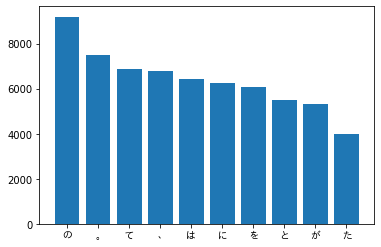

In [68]:
# 36. 頻度上位10語

x = range(10)
tick_label = [c[0] for c in count[:10]]
height = [c[1] for c in count[:10]]

plt.bar(x, height)
plt.xticks(x, tick_label, fontproperties=fp)
plt.show()

In [69]:
# 37. 「猫」と共起頻度の高い上位10語

size = len(neko)

index_list = [i + 1 for i, val in enumerate(neko) if val['surface'] == '。']

neko_sentense = [
    neko[i:j] 
    for i, j in zip(
        [0] + index_list,
        index_list + ([size] if index_list[-1] != size else [])
    )
]

# 。 ごとに文を区切る
#pprint(neko_sentense[:5])

c = defaultdict(int)

for ns in neko_sentense:
    if any([n['surface'] == '猫' for n in ns]):
        for n in ns:
            # if n['pos'] in ['名詞']:
            #     c[n['surface']] += 1
            c[n['surface']] += 1

c.pop('猫')

count_co_occ = sorted(c.items(), key=lambda k_v: k_v[1], reverse=True)

print(len(count_co_occ))
pprint(count_co_occ[:20])

1822
[('の', 397),
 ('は', 284),
 ('、', 265),
 ('に', 251),
 ('を', 240),
 ('て', 236),
 ('。', 219),
 ('と', 210),
 ('が', 185),
 ('で', 175),
 ('た', 131),
 ('も', 108),
 ('ある', 101),
 ('ない', 94),
 ('し', 86),
 ('な', 66),
 ('から', 64),
 ('だ', 63),
 ('吾輩', 61),
 ('事', 61)]


13584


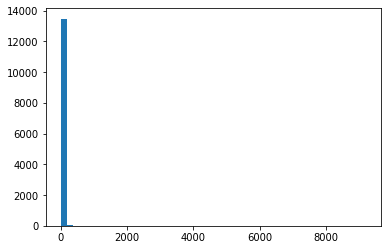

In [70]:
# 38. ヒストグラム

height = [c[1] for c in count]

print(len(height))

plt.hist(height, bins=50)
plt.show()

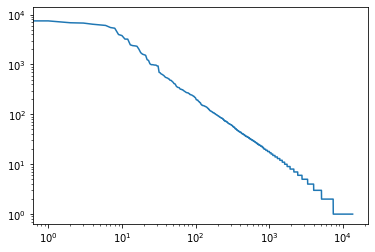

In [71]:
# 39. Zipfの法則

x = range(len(count))
height = [c[1] for c in count]

plt.plot(x, height)
plt.xscale('log')
plt.yscale('log')
plt.show()